# Classification Models on Recipes

This notebook contains simpler classification models rather than an LLM. The main goal here is to predict the calorie count given a recipe. 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [4]:
raw_df = pd.read_csv('recipes.csv')
raw_df.head()

,uri,label,image,source,url,shareAs,yield,dietLabels,healthLabels,cautions,...,calories,totalWeight,totalTime,cuisineType,mealType,dishType,totalNutrients,totalDaily,digest,tags
0,http://www.edamam.com/ontologies/edamam.owl#re...,Green Beans,https://edamam-product-images.s3.amazonaws.com...,Martha Stewart,http://www.marthastewart.com/338543/green-beans,http://www.edamam.com/recipe/green-beans-a91ad...,4.0,[],"['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,245.950111,471.932982,24.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN
1,http://www.edamam.com/ontologies/edamam.owl#re...,Sauteed Green Beans,https://edamam-product-images.s3.amazonaws.com...,Epicurious,https://www.epicurious.com/recipes/food/views/...,http://www.edamam.com/recipe/sauteed-green-bea...,8.0,"['Balanced', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,331.965452,699.388555,0.0,['french'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...","['Vegetarian', 'Vegan', 'Quick & Easy', 'Bean'..."
2,http://www.edamam.com/ontologies/edamam.owl#re...,Caramelized Green Beans,https://edamam-product-images.s3.amazonaws.com...,Saveur,http://www.saveur.com/article/Recipes/Carameli...,http://www.edamam.com/recipe/caramelized-green...,6.0,"['Low-Carb', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,1025.432452,793.988555,0.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN
3,http://www.edamam.com/ontologies/edamam.owl#re...,Sautéed Fresh Green Beans,https://edamam-product-images.s3.amazonaws.com...,EatingWell,http://www.eatingwell.com/recipe/261341/sautee...,http://www.edamam.com/recipe/saut%C3%A9ed-fres...,4.0,"['Balanced', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,220.173635,462.592370,5.0,['french'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...","['Gluten-Free', 'Low Fat', 'Vegan', 'High Fibe..."
4,http://www.edamam.com/ontologies/edamam.owl#re...,Fancy Green Beans,https://edamam-product-images.s3.amazonaws.com...,PBS Food,http://www.pbs.org/food/recipes/fancy-green-be...,http://www.edamam.com/recipe/fancy-green-beans...,2.0,"['Balanced', 'High-Fiber']","['Vegan', 'Vegetarian', 'Pescatarian', 'Dairy-...","['Sulfites', 'FODMAP']",...,245.191312,472.898439,47.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN


In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13272 entries, 0 to 13271
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uri              13272 non-null  object 
 1   label            13272 non-null  object 
 2   image            13272 non-null  object 
 3   source           13272 non-null  object 
 4   url              13272 non-null  object 
 5   shareAs          13272 non-null  object 
 6   yield            13272 non-null  float64
 7   dietLabels       13272 non-null  object 
 8   healthLabels     13272 non-null  object 
 9   cautions         13272 non-null  object 
 10  ingredientLines  13272 non-null  object 
 11  ingredients      13272 non-null  object 
 12  calories         13272 non-null  float64
 13  totalWeight      13272 non-null  float64
 14  totalTime        13272 non-null  float64
 15  cuisineType      13272 non-null  object 
 16  mealType         13272 non-null  object 
 17  dishType    

In [11]:
raw_df.describe()

,yield,calories,totalWeight,totalTime
count,13272.000000,13272.000000,13272.000000,13272.000000
mean,6.390032,1919.546543,1247.258306,59.567021
std,6.267674,1938.485052,1009.295434,400.767255
min,0.666000,0.840000,5.325627,0.000000
25%,4.000000,734.920750,575.989799,0.000000
50%,4.000000,1419.177262,980.685969,15.000000
75%,8.000000,2429.584040,1590.382305,45.000000
max,150.000000,44565.178197,7956.830802,30245.000000


In [22]:
raw_df[raw_df['calories'] < 5000]

,uri,label,image,source,url,shareAs,yield,dietLabels,healthLabels,cautions,...,calories,totalWeight,totalTime,cuisineType,mealType,dishType,totalNutrients,totalDaily,digest,tags
0,http://www.edamam.com/ontologies/edamam.owl#re...,Green Beans,https://edamam-product-images.s3.amazonaws.com...,Martha Stewart,http://www.marthastewart.com/338543/green-beans,http://www.edamam.com/recipe/green-beans-a91ad...,4.0,[],"['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,245.950111,471.932982,24.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN
1,http://www.edamam.com/ontologies/edamam.owl#re...,Sauteed Green Beans,https://edamam-product-images.s3.amazonaws.com...,Epicurious,https://www.epicurious.com/recipes/food/views/...,http://www.edamam.com/recipe/sauteed-green-bea...,8.0,"['Balanced', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,331.965452,699.388555,0.0,['french'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...","['Vegetarian', 'Vegan', 'Quick & Easy', 'Bean'..."
2,http://www.edamam.com/ontologies/edamam.owl#re...,Caramelized Green Beans,https://edamam-product-images.s3.amazonaws.com...,Saveur,http://www.saveur.com/article/Recipes/Carameli...,http://www.edamam.com/recipe/caramelized-green...,6.0,"['Low-Carb', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,1025.432452,793.988555,0.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN
3,http://www.edamam.com/ontologies/edamam.owl#re...,Sautéed Fresh Green Beans,https://edamam-product-images.s3.amazonaws.com...,EatingWell,http://www.eatingwell.com/recipe/261341/sautee...,http://www.edamam.com/recipe/saut%C3%A9ed-fres...,4.0,"['Balanced', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,220.173635,462.592370,5.0,['french'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...","['Gluten-Free', 'Low Fat', 'Vegan', 'High Fibe..."
4,http://www.edamam.com/ontologies/edamam.owl#re...,Fancy Green Beans,https://edamam-product-images.s3.amazonaws.com...,PBS Food,http://www.pbs.org/food/recipes/fancy-green-be...,http://www.edamam.com/recipe/fancy-green-beans...,2.0,"['Balanced', 'High-Fiber']","['Vegan', 'Vegetarian', 'Pescatarian', 'Dairy-...","['Sulfites', 'FODMAP']",...,245.191312,472.898439,47.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,http://www.edamam.com/ontologies/edamam.owl#re...,Red Pepper Farro With Tuna,https://edamam-product-images.s3.amazonaws.com...,Self,https://www.self.com/recipe/red-pepper-farro-w...,http://www.edamam.com/recipe/red-pepper-farro-...,6.0,[],"['Sugar-Conscious', 'Pescatarian', 'Mediterran...",['Sulfites'],...,1118.129068,652.479234,0.0,['italian'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN
13268,http://www.edamam.com/ontologies/edamam.owl#re...,Tuna Salad,https://edamam-product-images.s3.amazonaws.com...,Food Network,https://www.foodnetwork.com/recipes/food-netwo...,http://www.edamam.com/recipe/tuna-salad-9a9f92...,4.0,['Low-Carb'],"['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",['Sulfites'],...,848.826200,4

So most recipes have less than 5000 calories. Certainly past 10000 calories for a single meal is abnormal so we might consider removing these recipes from consideration. Likely though, most meals will have less than 2500 calories, so removing recipes with calories counts past aroudn 2500 makes the most sense.

In [8]:
raw_df.iloc[5]

uri                http://www.edamam.com/ontologies/edamam.owl#re...
label                                             French Green Beans
image              https://edamam-product-images.s3.amazonaws.com...
source                                                  Food Network
url                https://www.foodnetwork.com/recipes/danny-boom...
shareAs            http://www.edamam.com/recipe/french-green-bean...
yield                                                            6.0
dietLabels                                               ['Low-Fat']
healthLabels       ['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...
cautions                                                          []
ingredientLines    ['1 pound French green beans (haricots verts)'...
ingredients        [{'text': '1 pound French green beans (haricot...
calories                                                  140.613635
totalWeight                                               456.240835
totalTime                         

## Data Exploration and Preprocessing.

To start, we want to build a classification model on the calories column. So we will convert the column to bins to make it a classification task. Then the input will be the recipe name and we will also use the mealType and dishType since these are things people should know off hand normally. healthLabels and dietLabels won't always be easily known so it might be better to predicts these themselves rather than using them as inputs. 

In [25]:
#first drop duplicates from recipe names or label column
df = raw_df.drop_duplicates('label')
df.shape

(11680, 22)

In [77]:
df['dishType'].isna().sum()

114

In [78]:
df['mealType'].isna().sum()

0

In [79]:
# so we need to remove the rows with null dishType
df = df.dropna(subset=['dishType'])
print(df['dishType'].isna().sum())

0


In [80]:
df.shape

(11566, 22)

### Calories - Target Variable

In [128]:
#function for quick view of distribution
def plot_distribution(data, bins=10, title='Distribution', ylabel='Count'):
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black') #max calories value is 45000 so 45 bins
    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

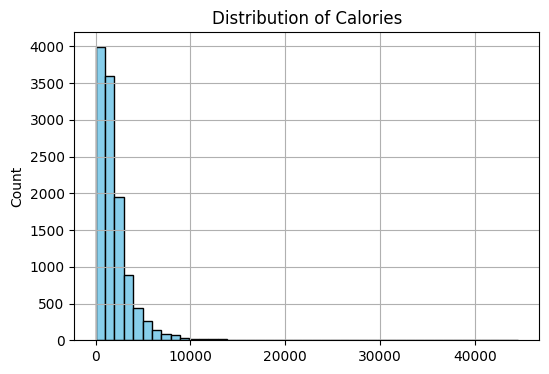

In [134]:
# Assuming dfplot_distribution is your DataFrame and 'column_name' is the name of the column containing the float data
calories_df = df['calories']

plot_distribution(calories_df, bins=45, title='Distribution of Calories')

Let's make this more reasonable to start with. Make the dataset only consider recipes with less than 2400 calories since that is normal, and counting calories is always error prone so going for ranges of 300 makes sense. 

In [147]:
def filter_calories_2400(df):
    return df[df['calories'] < 2400]['calories']
    
calories_df_2400 = filter_calories_2400(df)
calories_df_2400.shape

(8573,)

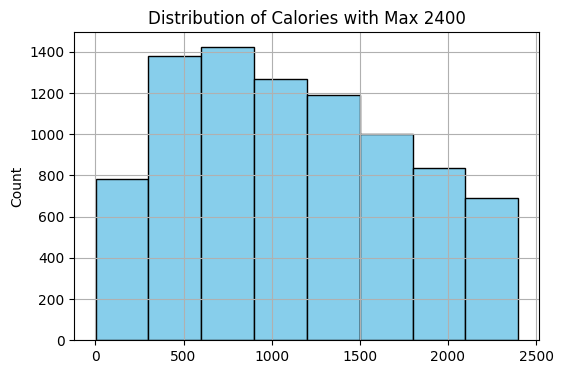

In [148]:
# Plotting histogram with no extreme values
plot_distribution(calories_df_2400, bins=8, title='Distribution of Calories with Max 2400')

The distribution looks normally distributed. Let's bin the calorie counts now.

In [348]:
#putting calories into ranges
bin_edges = [i for i in range(0, 2401, 300)]
labels = [f"{bin_edges[i]}-{bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)]
binned_calories = pd.cut(calories_df, bins=bin_edges, labels=labels, include_lowest=True)
binned_calories

0            0-299
1          300-599
2         900-1199
3            0-299
4            0-299
           ...    
13265          NaN
13266      300-599
13269    1500-1799
13270      300-599
13271      600-899
Name: calories, Length: 11566, dtype: category
Categories (8, object): ['0-299' < '300-599' < '600-899' < '900-1199' < '1200-1499' < '1500-1799' < '1800-2099' < '2100-2399']

In [349]:
binned_calories.isna().sum()

2993

In [350]:
Counter(binned_calories)

Counter({nan: 2993,
         '600-899': 1425,
         '300-599': 1381,
         '900-1199': 1269,
         '1200-1499': 1190,
         '1500-1799': 1002,
         '1800-2099': 834,
         '0-299': 780,
         '2100-2399': 692})

In [351]:
binned_calories.rename({'calories':'binnedCalories'}, inplace=True)

In [352]:
binned_calories = binned_calories.dropna()

In [372]:
#get the full dataframe with these indices
binned_calories_df = df.loc[binned_calories.index]
binned_calories_df = pd.concat([binned_calories_df, binned_calories], axis = 1)
binned_calories_df.head()

,uri,label,image,source,url,shareAs,yield,dietLabels,healthLabels,cautions,...,totalWeight,totalTime,cuisineType,mealType,dishType,totalNutrients,totalDaily,digest,tags,calories
0,http://www.edamam.com/ontologies/edamam.owl#re...,Green Beans,https://edamam-product-images.s3.amazonaws.com...,Martha Stewart,http://www.marthastewart.com/338543/green-beans,http://www.edamam.com/recipe/green-beans-a91ad...,4.0,[],"['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,471.932982,24.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN,0-299
1,http://www.edamam.com/ontologies/edamam.owl#re...,Sauteed Green Beans,https://edamam-product-images.s3.amazonaws.com...,Epicurious,https://www.epicurious.com/recipes/food/views/...,http://www.edamam.com/recipe/sauteed-green-bea...,8.0,"['Balanced', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,699.388555,0.0,['french'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...","['Vegetarian', 'Vegan', 'Quick & Easy', 'Bean'...",300-599
2,http://www.edamam.com/ontologies/edamam.owl#re...,Caramelized Green Beans,https://edamam-product-images.s3.amazonaws.com...,Saveur,http://www.saveur.com/article/Recipes/Carameli...,http://www.edamam.com/recipe/caramelized-green...,6.0,"['Low-Carb', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,793.988555,0.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN,900-1199
3,http://www.edamam.com/ontologies/edamam.owl#re...,Sautéed Fresh Green Beans,https://edamam-product-images.s3.amazonaws.com...,EatingWell,http://www.eatingwell.com/recipe/261341/sautee...,http://www.edamam.com/recipe/saut%C3%A9ed-fres...,4.0,"['Balanced', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,462.592370,5.0,['french'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...","['Gluten-Free', 'Low Fat', 'Vegan', 'High Fibe...",0-299
4,http://www.edamam.com/ontologies/edamam.owl#re...,Fancy Green Beans,https://edamam-product-images.s3.amazonaws.com...,PBS Food,http://www.pbs.org/food/recipes/fancy-green-be...,http://www.edamam.com/recipe/fancy-green-beans...,2.0,"['Balanced', 'High-Fiber']","['Vegan', 'Vegetarian', 'Pescatarian', 'Dairy-...","['Sulfites', 'FODMAP']",...,472.898439,47.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN,0-299


In [373]:
binned_calories_df.reset_index(inplace=True)
binned_calories_df.shape

(8573, 24)

In [374]:
binned_calories_df.columns

Index(['index', 'uri', 'label', 'image', 'source', 'url', 'shareAs', 'yield',
       'dietLabels', 'healthLabels', 'cautions', 'ingredientLines',
       'ingredients', 'calories', 'totalWeight', 'totalTime', 'cuisineType',
       'mealType', 'dishType', 'totalNutrients', 'totalDaily', 'digest',
       'tags', 'calories'],
      dtype='object')

Later we will probably do label encoding.

### Input Variables

#### Label

In [357]:
binned_calories_df['label']

0                     Green Beans
1             Sauteed Green Beans
2         Caramelized Green Beans
3       Sautéed Fresh Green Beans
4               Fancy Green Beans
                  ...            
8568                    Tuna Melt
8569             Quick Tuna Salad
8570         Savory Tuna Sandwich
8571      Tiny Tuna Melts recipes
8572         Mexi-Cali Tuna Salad
Name: label, Length: 8573, dtype: object

Nothing to do here now. Will have to use NLP to preprocess.

#### dishType

In [358]:
dishType_df = binned_calories_df['dishType'].apply(ast.literal_eval)

In [359]:
#we have a few columns with list elements and we want to see the unqiue values so this function can do that
def get_values(df, column):
    df.loc[df[column].isna(), column] = '[]'
    labels_lst = []
    for label in df[column].apply(ast.literal_eval):
        labels_lst += label
    return labels_lst

#this checks to see what recipes are multilabeled for the given column
def check_if_multilabel(df, column):
    lst = []
    for row in df[column].apply(ast.literal_eval):
        if len(row) > 1:
            lst.append(row)
    return lst

In [360]:
from collections import Counter
Counter(get_values(binned_calories_df, 'dishType'))

Counter({'main course': 2696,
         'starter': 1519,
         'condiments and sauces': 1041,
         'salad': 905,
         'desserts': 812,
         'soup': 357,
         'drinks': 347,
         'sandwiches': 343,
         'bread': 182,
         'cereals': 182,
         'alcohol cocktail': 152,
         'biscuits and cookies': 62,
         'pancake': 61,
         'egg': 36,
         'preserve': 11,
         'omelet': 7,
         'special occasions': 6,
         'christmas': 4,
         'preps': 3,
         'thanksgiving': 1,
         'cinco de mayo': 1})

In [361]:
print('Number of unique dish types:', len(set(get_unique_values(binned_calories_df, 'dishType'))))

Number of unique dish types: 21


In [362]:
len(check_if_multilabel(binned_calories_df, 'dishType'))

142

In [363]:
priority_list_dish_type = [
    'main course',
    'starter',
    'salad',
    'soup',
    'drinks',
    'bread',
    'desserts',
    'condiments and sauces',
    'sandwiches',
    'cereals',
    'alcohol cocktail',
    'biscuits and cookies',
    'pancake',
    'egg',
    'preserve',
    'omelet',
    'special occasions',
    'christmas',
    'preps',
    'thanksgiving',
    'cinco de mayo'
]

In [364]:
new_dish_type_df = []
for dish_type_lst in dishType_df:
    if len(dish_type_lst) == 1:
        new_dish_type_df.append(dish_type_lst[0])
    else:
        for dish_type in priority_list_dish_type:
            if dish_type in dish_type_lst:
                new_dish_type_df.append(dish_type)
                break

In [365]:
Counter(new_dish_type_df)

Counter({'main course': 2696,
         'starter': 1506,
         'condiments and sauces': 1032,
         'salad': 857,
         'desserts': 804,
         'drinks': 347,
         'soup': 342,
         'sandwiches': 337,
         'bread': 182,
         'cereals': 180,
         'alcohol cocktail': 152,
         'biscuits and cookies': 62,
         'pancake': 61,
         'preserve': 11,
         'preps': 3,
         'special occasions': 1})

In [366]:
new_dish_type_df = pd.DataFrame(new_dish_type_df)
new_dish_type_df.rename(columns={0: 'dishTypeLabel'}, inplace=True)
new_dish_type_df.head()

,dishTypeLabel
0,main course
1,starter
2,main course
3,starter
4,main course


In [367]:
df2 = pd.concat([binned_calories_df, new_dish_type_df], axis=1)
df2.columns

Index(['index', 'uri', 'label', 'image', 'source', 'url', 'shareAs', 'yield',
       'dietLabels', 'healthLabels', 'cautions', 'ingredientLines',
       'ingredients', 'calories', 'totalWeight', 'totalTime', 'cuisineType',
       'mealType', 'dishType', 'totalNutrients', 'totalDaily', 'digest',
       'tags', 'calories', 'dishTypeLabel'],
      dtype='object')

In [368]:
main_course_df = df2[df2['dishTypeLabel'] == df2['dishTypeLabel'][0]]

In [371]:
main_course_df['calories']

,calories,calories
0,245.950111,0-299
2,1025.432452,900-1199
4,245.191312,0-299
6,259.953635,0-299
9,465.562019,300-599
...,...,...
8553,967.593819,900-1199
8556,960.772683,900-1199
8564,1338.023435,1200-1499
8565,1944.588333,1800-2099


In [370]:
main_course_df_2400 = filter_calories_2400(main_course_df)
plot_distribution(main_course_df_2400, bins=24, title='Distribution of Calories for main_course')

TypeError: Invalid comparison between dtype=category and int

#### mealType

In [235]:
set(get_values(binned_calories_df, 'mealType'))

{'breakfast', 'brunch', 'lunch/dinner', 'snack', 'teatime'}

In [236]:
Counter(get_values(binned_calories_df, 'mealType'))

Counter({'lunch/dinner': 7365,
         'breakfast': 699,
         'snack': 327,
         'brunch': 115,
         'teatime': 94})

In [237]:
len(check_if_multilabel(binned_calories_df, 'mealType'))

27

In [238]:
mealType_df = binned_calories_df['mealType'].apply(ast.literal_eval)

Let's explore the calorie distribution for each of these meal types and see if we can combine any of them.

In [242]:
brunch_df = df[df['mealType'] == "['brunch']"]
breakfast_df = df[df['mealType'] == "['breakfast']"]
teatime_df = df[df['mealType'] == "['teatime']"]
snack_df = df[df['mealType'] == "['snack']"]
lunchdinner_df = df[df['mealType'] == "['lunch/dinner']"]

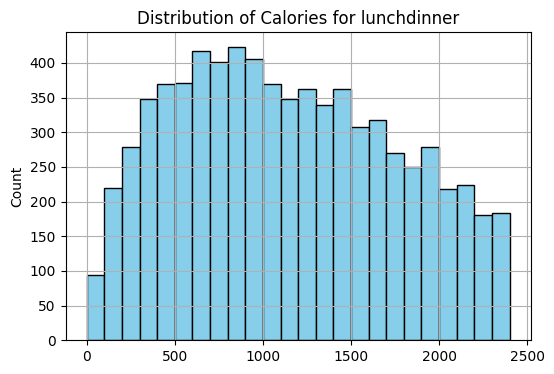

In [243]:
lunchdinner_df_2400 = filter_calories_2400(lunchdinner_df)
plot_distribution(lunchdinner_df_2400, bins=24, title='Distribution of Calories for lunchdinner')

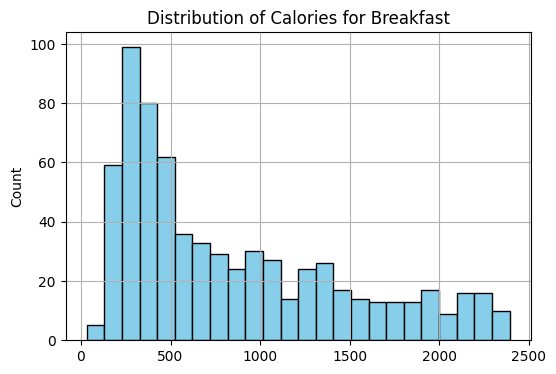

In [157]:
breakfast_df_2400 = filter_calories_2400(breakfast_df)
plot_distribution(breakfast_df_2400, bins=24, title='Distribution of Calories for Breakfast')

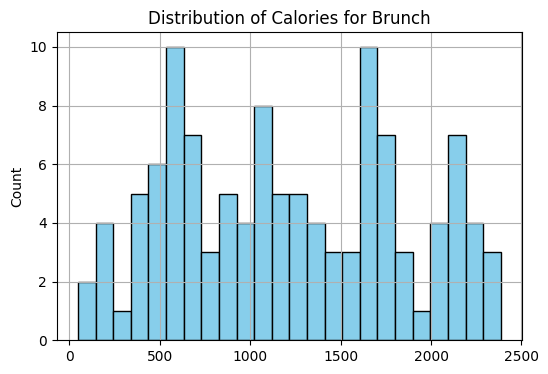

In [158]:
brunch_df_2400 = filter_calories_2400(brunch_df)
plot_distribution(brunch_df_2400, bins=24, title='Distribution of Calories for Brunch')

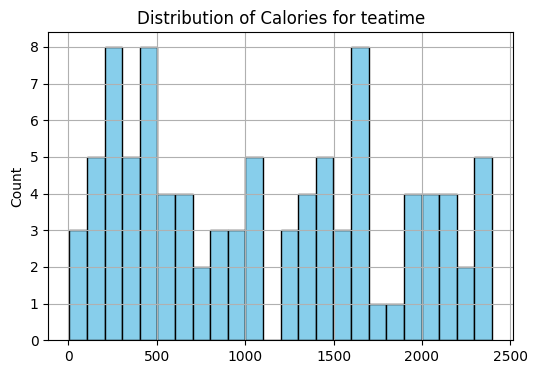

In [156]:
teatime_df_2400 = filter_calories_2400(teatime_df)
plot_distribution(teatime_df_2400, bins=24, title='Distribution of Calories for teatime')

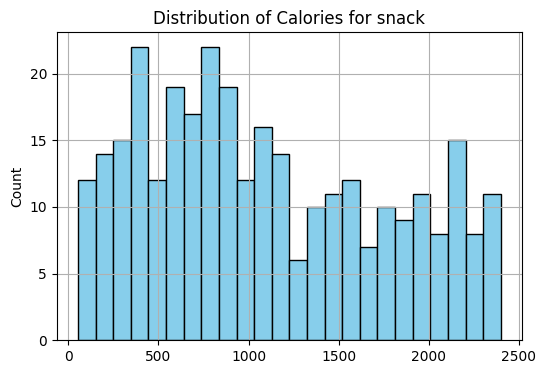

In [155]:
snack_df_2400 = filter_calories_2400(snack_df)
plot_distribution(snack_df_2400, bins=24, title='Distribution of Calories for snack')

So lunch/dinner is more so normally distributed. Breakfast is skewed, and the rest are kind of all over the place but with a somewhat cyclical pattern. Let's combine them into an other category now since they are all few in count anyway.

In [245]:
Counter(get_values(binned_calories_df, 'mealType'))

Counter({'lunch/dinner': 7365,
         'breakfast': 699,
         'snack': 327,
         'brunch': 115,
         'teatime': 94})

In [246]:
#for multilabeled rows we need a priority list to select which one we want to keep so it has just one main label
meal_type_priority_list = ['breakfast', 'lunch/dinner', 'brunch', 'snack', 'teatime']
new_meal_type_df = []
for meal_type_lst in mealType_df:
    if len(meal_type_lst) > 1:
        for meal_type in meal_type_priority_list:
            if meal_type in meal_type_lst:
                new_meal_type_df.append(meal_type)
                break
    else:
        new_meal_type_df.append(meal_type_lst[0])


# Define a function to replace 'brunch', 'teatime' into snack also
def replace_values(value):
    if value in ['brunch', 'teatime']:
        return 'snack'
    else:
        return value

new_meal_type_df = [replace_values(meal_type) for meal_type in new_meal_type_df]

In [247]:
new_meal_type_df = pd.DataFrame(new_meal_type_df)
new_meal_type_df.rename(columns={0: 'mealType'}, inplace=True)

In [248]:
Counter(new_meal_type_df['mealType'])

Counter({'lunch/dinner': 7354, 'breakfast': 699, 'snack': 520})

In [249]:
new_meal_type_df

,mealType
0,lunch/dinner
1,lunch/dinner
2,lunch/dinner
3,lunch/dinner
4,lunch/dinner
...,...
8568,lunch/dinner
8569,lunch/dinner
8570,lunch/dinner
8571,lunch/dinner


In [250]:
binned_calories_df = pd.concat([binned_calories_df, new_meal_type_df], axis = 1)